In [2]:
import os
import csv
import copy
import pandas as pd
from pandas import Series, DataFrame
import copy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import TextIOWrapper

In [3]:
a = r'C:\Users\ziyi Su\aae718\emissions'
file_path = os.path.join(a)
files = [file for file in os.listdir(file_path) if file.endswith('.csv')]
files

['1970.csv',
 '1971.csv',
 '1972.csv',
 '1973.csv',
 '1974.csv',
 '1975.csv',
 '1976.csv',
 '1977.csv',
 '1978.csv',
 '1979.csv',
 '1980.csv',
 '1981.csv',
 '1982.csv',
 '1983.csv',
 '1984.csv',
 '1985.csv',
 '1986.csv',
 '1987.csv',
 '1988.csv',
 '1989.csv',
 '1990.csv',
 '1991.csv',
 '1992.csv',
 '1993.csv',
 '1994.csv',
 '1995.csv',
 '1996.csv',
 '1997.csv',
 '1998.csv',
 '1999.csv',
 '2000.csv',
 '2001.csv',
 '2002.csv',
 '2003.csv',
 '2004.csv',
 '2005.csv',
 '2006.csv',
 '2007.csv',
 '2008.csv',
 '2009.csv',
 '2010.csv',
 '2011.csv',
 '2012.csv']

In [4]:
def csv_files(directory):
#a = r'C:\Users\ziyi Su\aae718\emissions'
    file_path = os.path.join(directory)
    files = [file for file in os.listdir(file_path) if file.endswith('.csv')]
    return files

In [5]:
def load_emission_csv(path, string):
#file_path = r'C:\Users\ziyi Su\aae718\emissions\1970.csv'
    with open(path) as f:
        rd = pd.read_csv(f)
    rd.insert(loc=0, column='year', value=string)
    return rd

In [6]:
rd = 

SyntaxError: invalid syntax (2562087597.py, line 1)

In [7]:
directory = r'C:\Users\ziyi Su\aae718\emissions'

In [8]:
def load_emissions(directory):
    files = csv_files(directory)

    for file in files:
        file_path = f'{directory}/{file}'
        df = load_emission_csv(file_path, file.split('.')[0])
    
        if file.split('.')[0] == '1970':
            df1 = df.copy(deep=True)
        else:
            df1 = pd.concat([df1,df], axis=0, ignore_index=True)
    return df1

In [9]:
df1 = load_emissions(directory)
df1

,year,Country,Emissions.Type.CO2,Emissions.Type.N2O,Emissions.Type.CH4,Emissions.Sector.Power Industry,Emissions.Sector.Buildings,Emissions.Sector.Transport,Emissions.Sector.Other Industry,Emissions.Sector.Other sectors,Ratio.Per GDP,Ratio.Per Capita
0,1970,Afghanistan,2670.00,1820.0,12800.00,0.06,0.58,0.23,0.07,0.53,1.557705,0.000000
1,1970,Albania,650.00,2090.0,4480.00,0.60,0.99,0.73,1.47,0.59,3.355742,0.960599
2,1970,Algeria,2140.00,18900.0,46500.00,1.65,1.81,2.66,2.48,8.58,4.645362,0.742141
3,1970,Angola,1720.00,8950.0,35200.00,0.14,0.12,1.03,0.33,1.94,6.772412,1.152300
4,1970,Anguilla,0.11,2.7,2.17,0.00,0.00,0.00,0.00,0.00,0.776791,0.071783
...,...,...,...,...,...,...,...,...,...,...,...,...
8380,2012,Viet Nam,20400.00,165000.0,110000.00,41.46,11.35,29.61,42.35,29.26,3.263215,0.677397
8381,2012,Virgin Islands,5.17,10.4,85.00,0.06,0.01,0.04,0.00,0.00,3.528594,0.172276
8382,2012,Yemen,4610.00,18500.0,22700.00,5.81,3.03,5.48,3.10,3.66,1.838715,0.510111
8383,2012,Zambia,3380.00,6350.0,10400.00,0.03,0.24,0.91,1.53,0.85,1.363735,0.390306


In [10]:
country_path = r'C:\Users\ziyi Su\aae718\country_codes.csv'

In [11]:
def problem_04(directory, country_path):
    df1 = load_emissions(directory)

    with open(country_path) as f:
        rd = pd.read_csv(f)
    rd.rename(columns={'name':'Country'}, inplace = True)
    
    merged_df = pd.merge(rd[['Country','alpha-2','region','sub-region']],df1)
    return merged_df

In [12]:
merged_df = problem_04(directory, country_path)
merged_df

,Country,alpha-2,region,sub-region,year,Emissions.Type.CO2,Emissions.Type.N2O,Emissions.Type.CH4,Emissions.Sector.Power Industry,Emissions.Sector.Buildings,Emissions.Sector.Transport,Emissions.Sector.Other Industry,Emissions.Sector.Other sectors,Ratio.Per GDP,Ratio.Per Capita
0,Afghanistan,AF,Asia,Southern Asia,1970,2670.0,1820.0,12800.0,0.06,0.58,0.23,0.07,0.53,1.557705,0.000000
1,Afghanistan,AF,Asia,Southern Asia,1971,2630.0,1850.0,12900.0,0.06,0.58,0.23,0.07,0.53,1.517670,0.000000
2,Afghanistan,AF,Asia,Southern Asia,1972,2180.0,1810.0,11900.0,0.12,0.46,0.27,0.05,0.61,1.357590,0.000000
3,Afghanistan,AF,Asia,Southern Asia,1973,2310.0,1830.0,11600.0,0.17,0.57,0.24,0.02,0.47,1.307901,0.000000
4,Afghanistan,AF,Asia,Southern Asia,1974,2520.0,2190.0,12800.0,0.21,0.77,0.24,0.03,0.65,1.425016,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,Zimbabwe,ZW,Africa,Sub-Saharan Africa,2008,4150.0,11200.0,7960.0,2.66,2.39,1.02,1.39,0.60,1.720451,1.417634
7263,Zimbabwe,ZW,Africa,Sub-Saharan Africa,2009,4100.0,11100.0,8640.0,2.71,2.71,1.08,0.68,0.58,1.728668,1.368000
7264,Zimbabwe,ZW,Africa,Sub-Saharan Africa,2010,4100.0,11100.0,9580.0,4.84,1.92,1.20,1.26,0.77,1.761650,1.276703
7265,Zimbabwe,ZW,Africa,Sub-Saharan Africa,2011,4130.0,11300.0,10500.0,5.95,1.32,2.28,1.52,0.91,1.797911,1.193823


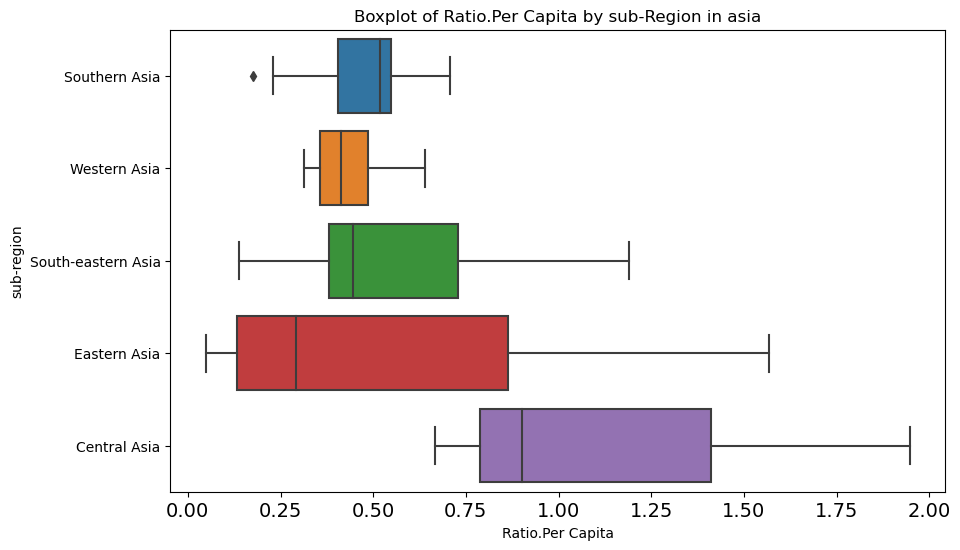

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ratio.Per Capita', y='sub-region', data=merged_df[(merged_df['region'] == 'Asia') & (merged_df['year'] == '2010')])
plt.tick_params(axis='x', labelsize=14)
plt.title('Boxplot of Ratio.Per Capita by sub-Region in asia')
plt.savefig('hwk4_boxplot1.png')
plt.show()
plt.close()

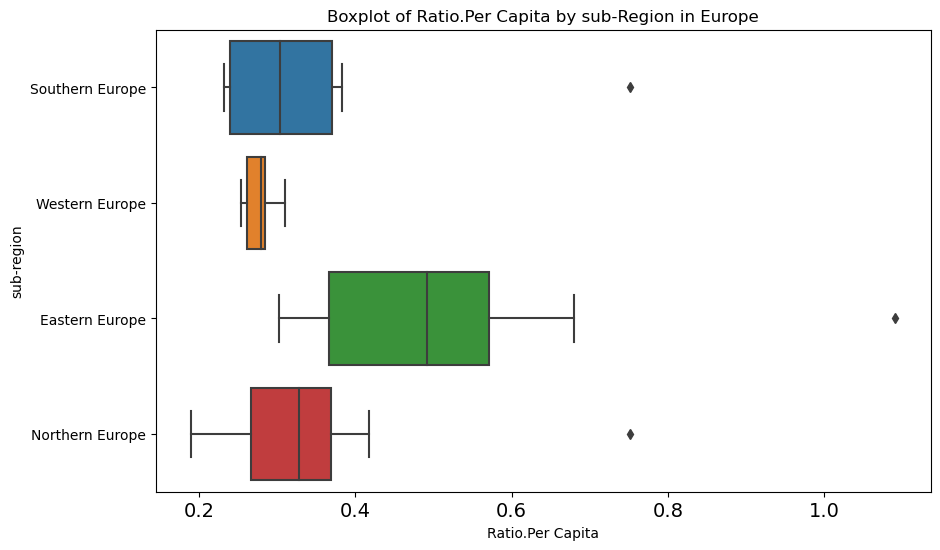

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ratio.Per Capita', y='sub-region', data=merged_df[(merged_df['region'] == 'Europe') & (merged_df['year'] == '2010')])
plt.tick_params(axis='x', labelsize=14)
plt.title('Boxplot of Ratio.Per Capita by sub-Region in Europe')
plt.savefig('hwk4_boxplot2.png')
plt.show()
plt.close()

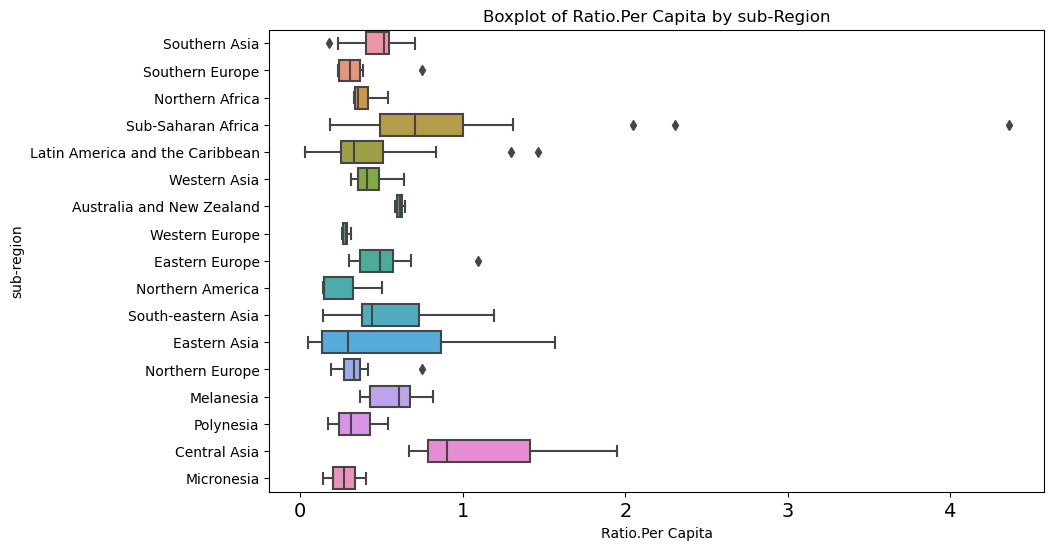

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ratio.Per Capita', y='sub-region', data=merged_df[(merged_df['year'] == '2010')])
plt.tick_params(axis='x', labelsize=14)
plt.title('Boxplot of Ratio.Per Capita by sub-Region')
plt.savefig('hwk4_boxplot3.png')
plt.show()
plt.close()

In [46]:
with open('dirty_data_01.csv') as f:
        dd = pd.read_csv(f,header=[0,1],index_col=0)
dd#['Same Day']
#dd.columns = dd.columns.map(''.join)
#dd = dd.loc[:, ~dd.columns.str.endswith('level_1')]
dd = dd.reset_index()
#dd.rename(columns={'index': 'Order ID'})
dd

Segment>>,Order ID,Consumer,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Consumer Total,Corporate,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,Corporate Total,Home Office,Unnamed: 12_level_0,Unnamed: 13_level_0,Unnamed: 14_level_0,Home Office Total
Ship Mode>>,,First Class,Same Day,Second Class,Standard Class,Unnamed: 5_level_1,First Class,Same Day,Second Class,Standard Class,Unnamed: 10_level_1,First Class,Same Day,Second Class,Standard Class,Unnamed: 15_level_1
0,CA-2011-100293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0560,91.0560
1,CA-2011-100706,NaN,NaN,129.4400,NaN,129.440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CA-2011-100895,NaN,NaN,NaN,605.4700,605.470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CA-2011-100916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,788.8600,788.8600,NaN,NaN,NaN,NaN,NaN
4,CA-2011-101266,NaN,NaN,13.3600,NaN,13.360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,US-2014-166611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.7420,68.7420,NaN,NaN,NaN,NaN,NaN
819,US-2014-167920,NaN,NaN,1827.5100,NaN,1827.510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
820,US-2014-168116,NaN,NaN,NaN,NaN,NaN,NaN,8167.420,NaN,NaN,8167.4200,NaN,NaN,NaN,NaN,NaN


In [47]:
dd1 = pd.melt(dd, id_vars=['Order ID'], var_name=['Segment','Ship Mode'], value_name='Sales')
dd1

,Order ID,Segment,Ship Mode,Sales
0,CA-2011-100293,Consumer,First Class,NaN
1,CA-2011-100706,Consumer,First Class,NaN
2,CA-2011-100895,Consumer,First Class,NaN
3,CA-2011-100916,Consumer,First Class,NaN
4,CA-2011-101266,Consumer,First Class,NaN
...,...,...,...,...
12340,US-2014-166611,Home Office Total,Unnamed: 15_level_1,NaN
12341,US-2014-167920,Home Office Total,Unnamed: 15_level_1,NaN
12342,US-2014-168116,Home Office Total,Unnamed: 15_level_1,NaN
12343,US-2014-168690,Home Office Total,Unnamed: 15_level_1,NaN


In [48]:
dd1.loc[dd1['Segment'].str.contains('Unnamed: 2|Unnamed: 3|Unnamed: 4'), 'Segment'] = 'Consumer'
dd1.loc[dd1['Segment'].str.contains('7|8|9'), 'Segment'] = 'Corporate'
dd1.loc[dd1['Segment'].str.contains('12|13|14'), 'Segment'] = 'Home Office'
dd1.iloc[6677]        

Order ID     CA-2011-149020
Segment           Corporate
Ship Mode    Standard Class
Sales                 54.83
Name: 6677, dtype: object

In [49]:
dd1 = dd1.dropna(subset=['Sales'])
dd1

,Order ID,Segment,Ship Mode,Sales
11,CA-2011-103366,Consumer,First Class,149.9500
20,CA-2011-109043,Consumer,First Class,243.6000
29,CA-2011-113166,Consumer,First Class,9.5680
51,CA-2011-124023,Consumer,First Class,8.9600
63,CA-2011-130155,Consumer,First Class,34.2000
...,...,...,...,...
12324,US-2014-148768,Home Office Total,Unnamed: 15_level_1,71.9760
12331,US-2014-156083,Home Office Total,Unnamed: 15_level_1,9.6640
12333,US-2014-159205,Home Office Total,Unnamed: 15_level_1,732.9300
12335,US-2014-162558,Home Office Total,Unnamed: 15_level_1,2437.6720


In [50]:
dd1.iloc[72]

Order ID     Grand Total
Segment         Consumer
Ship Mode    First Class
Sales          20802.173
Name: 822, dtype: object

In [51]:
dd1 = dd1.reset_index()
dd1.drop('index',axis=1,inplace = True)
rows_to_drop = []
for i in range(len(dd1)):
    if (('Total' in dd1.iloc[i]['Segment']) or ('Total' in dd1.iloc[i]['Order ID'])):
        rows_to_drop.append(i)

dd1

,Order ID,Segment,Ship Mode,Sales
0,CA-2011-103366,Consumer,First Class,149.9500
1,CA-2011-109043,Consumer,First Class,243.6000
2,CA-2011-113166,Consumer,First Class,9.5680
3,CA-2011-124023,Consumer,First Class,8.9600
4,CA-2011-130155,Consumer,First Class,34.2000
...,...,...,...,...
1654,US-2014-148768,Home Office Total,Unnamed: 15_level_1,71.9760
1655,US-2014-156083,Home Office Total,Unnamed: 15_level_1,9.6640
1656,US-2014-159205,Home Office Total,Unnamed: 15_level_1,732.9300
1657,US-2014-162558,Home Office Total,Unnamed: 15_level_1,2437.6720


In [52]:
dd1 = dd1.drop(rows_to_drop).reset_index()

In [53]:
dd1.drop('index',axis=1,inplace = True)

In [59]:
dd1.iloc[744]

Order ID     CA-2012-103772
Segment         Home Office
Ship Mode    Standard Class
Sales                260.31
Name: 744, dtype: object

In [130]:
with open('school_data/ussd20.txt') as t: 
    data = t.read().splitlines()
    #dt = pd.read_csv(TextIOWrapper(t))
    #dt = pd.read_csv(t,sep='\s+')
dt = pd.DataFrame(data)

In [131]:
dt

,0
0,01 00190 Alabaster City School District ...
1,01 00005 Albertville City School District ...
2,01 00030 Alexander City City School District ...
3,01 00060 Andalusia City School District ...
4,01 00090 Anniston City School District ...
...,...
13167,56 04260 Uinta County School District 6 ...
13168,56 06240 Washakie County School District 1 ...
13169,56 05820 Washakie County School District 2 ...
13170,56 04830 Weston County School District 1 ...


In [151]:
col_names = ['FIPS State code', 'District ID', 'District Name', 'Total Population', 
             'Population of Relevant Children 5 to 17 years of Age', 
             'Estimated Number of Relevant Children 5 to 17 years old in Poverty Related to the Householder', 
             'Tag']


col_widths = [2, 6, 72, 10, 10, 8, 21]


with open('school_data/ussd20.txt', 'rb') as file:
    df = pd.read_fwf(TextIOWrapper(file), widths=col_widths, names=col_names)



In [152]:
df

,FIPS State code,District ID,District Name,Total Population,Population of Relevant Children 5 to 17 years of Age,Estimated Number of Relevant Children 5 to 17 years old in Poverty Related to the Householder,Tag
0,1,190,Alabaster City School District,35268,6797,669,ussd20.txt 26NOV2021
1,1,5,Albertville City School District,22120,4163,918,ussd20.txt 26NOV2021
2,1,30,Alexander City City School District,16819,2579,700,ussd20.txt 26NOV2021
3,1,60,Andalusia City School District,8818,1471,346,ussd20.txt 26NOV2021
4,1,90,Anniston City School District,22017,3053,735,ussd20.txt 26NOV2021
...,...,...,...,...,...,...,...
13167,56,4260,Uinta County School District 6,3116,723,39,ussd20.txt 26NOV2021
13168,56,6240,Washakie County School District 1,7094,1236,139,ussd20.txt 26NOV2021
13169,56,5820,Washakie County School District 2,666,86,9,ussd20.txt 26NOV2021
13170,56,4830,Weston County School District 1,5320,796,88,ussd20.txt 26NOV2021
